In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv("data/seeds_dataset.txt", names=cols, sep="\s+")

In [3]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


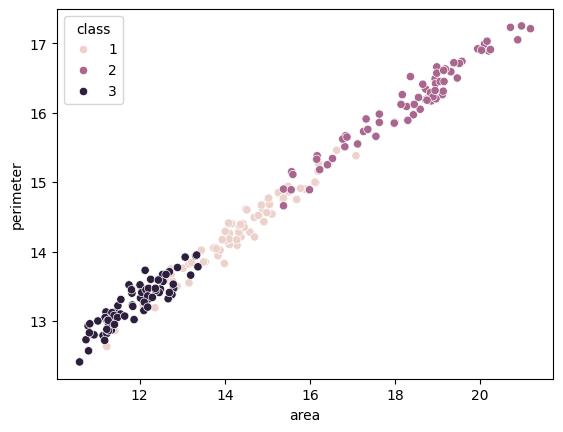

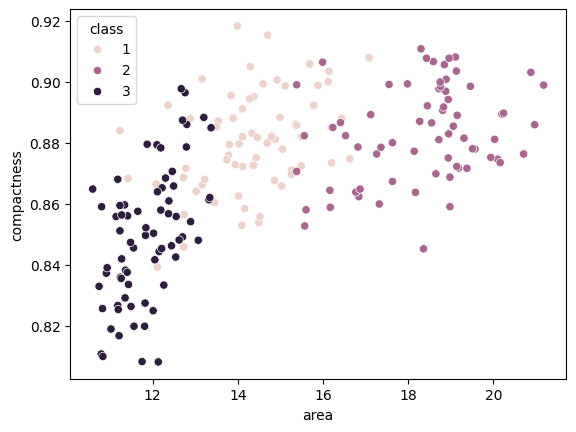

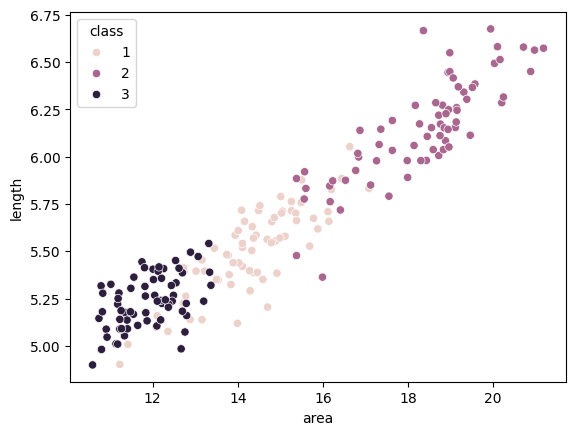

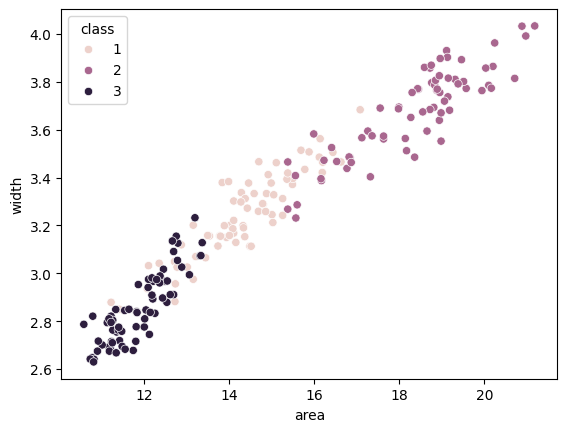

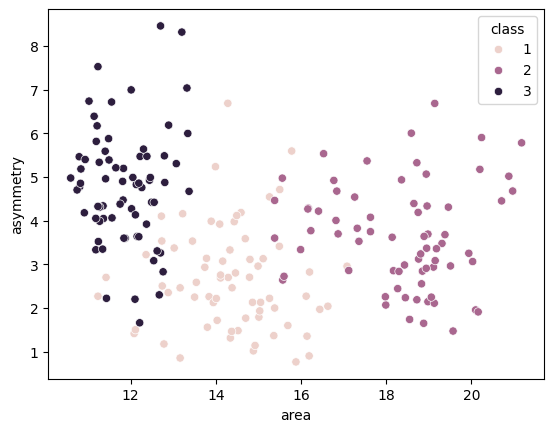

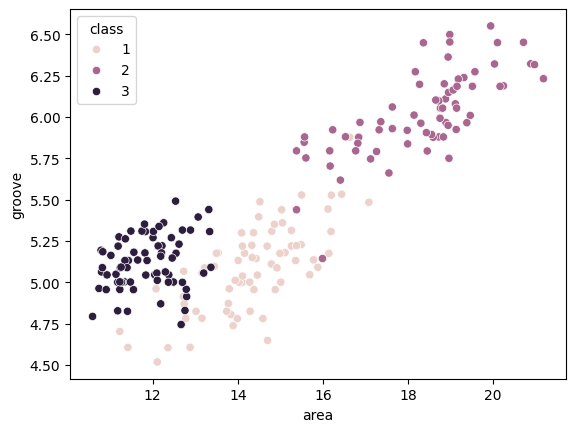

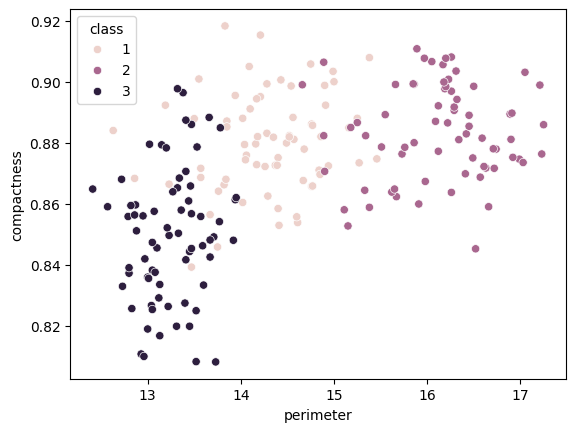

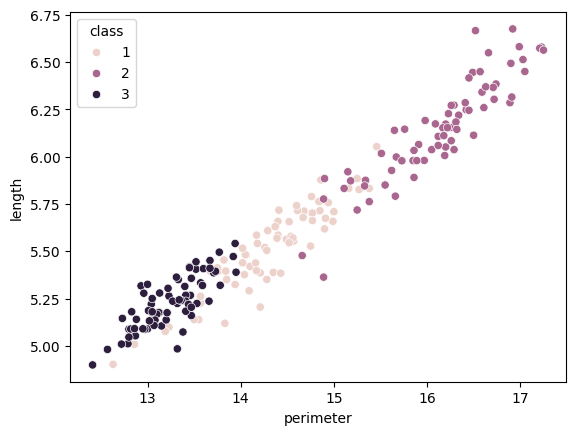

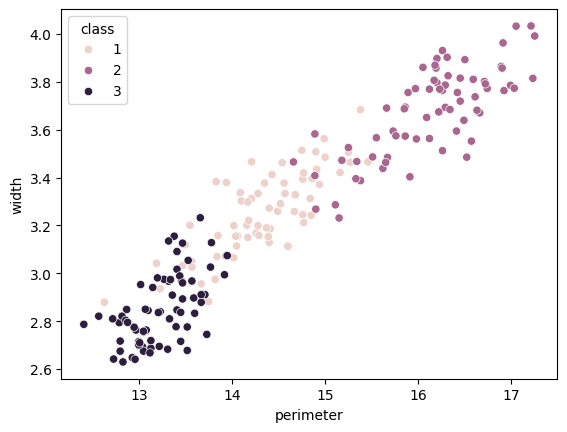

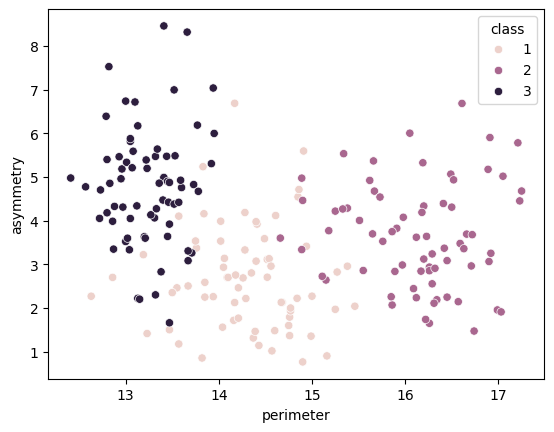

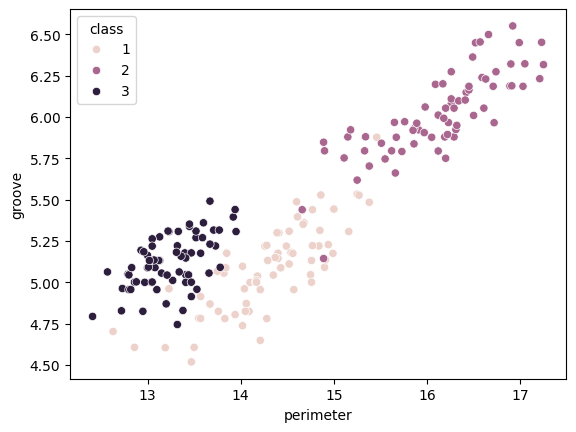

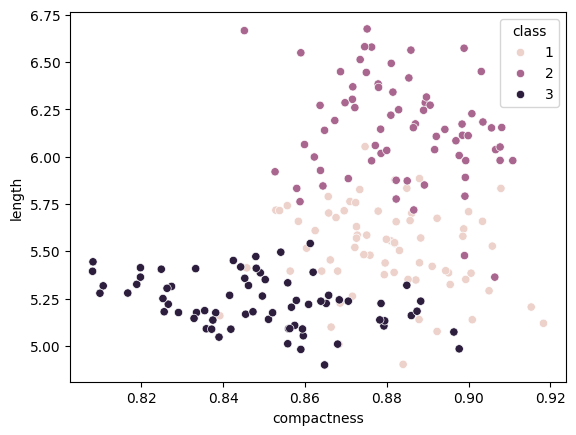

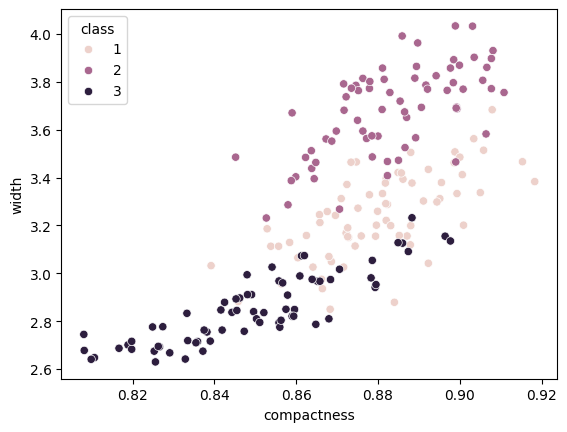

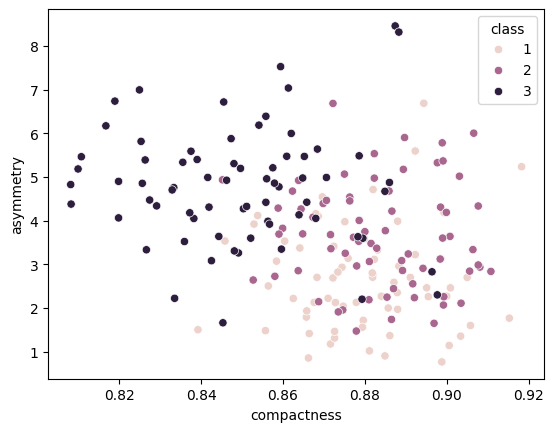

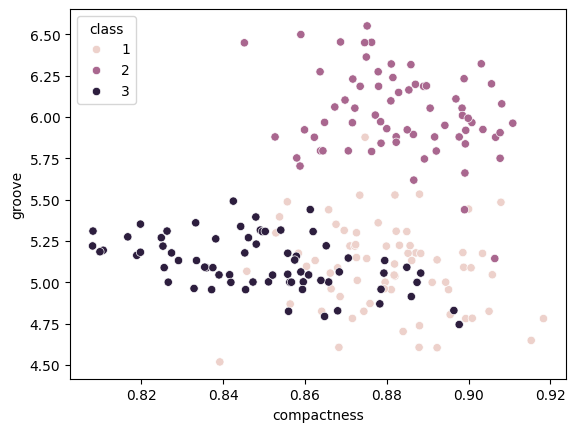

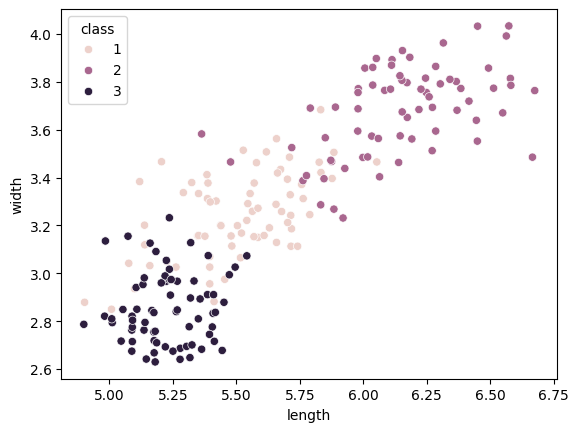

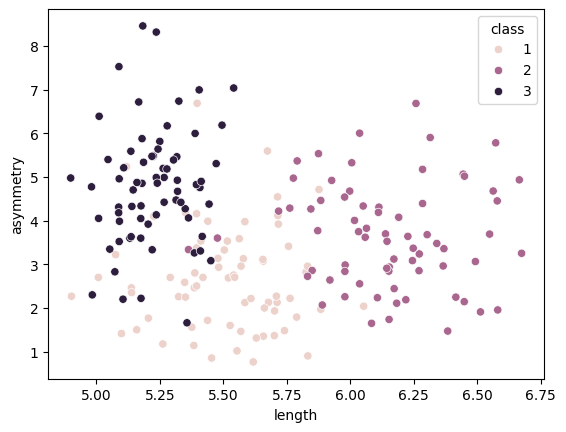

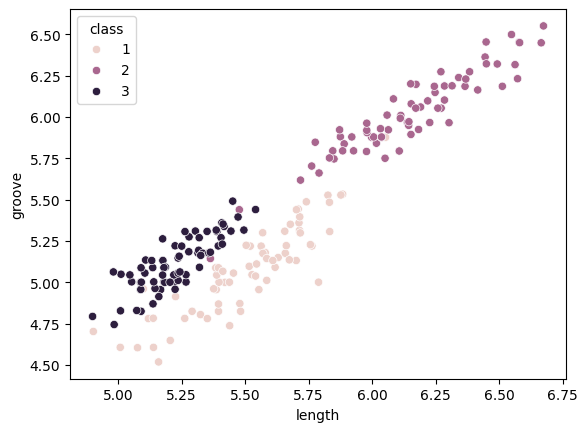

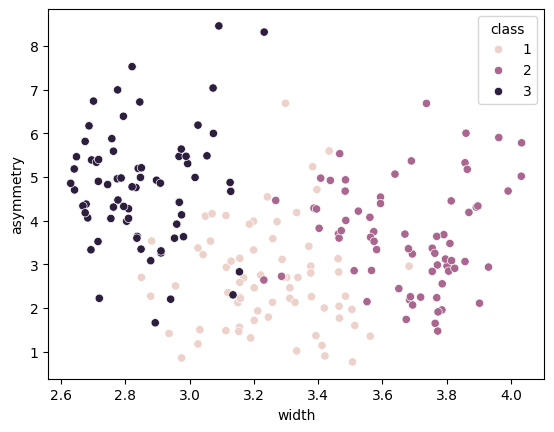

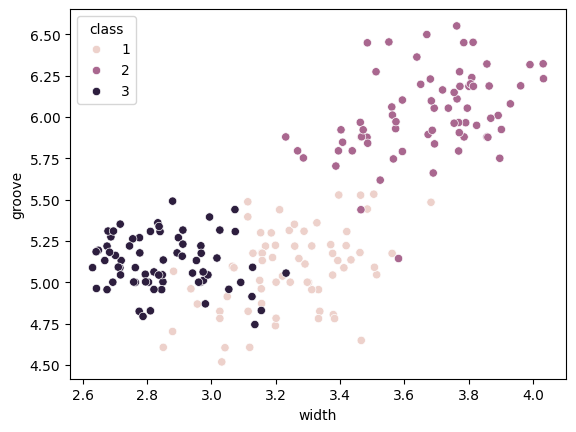

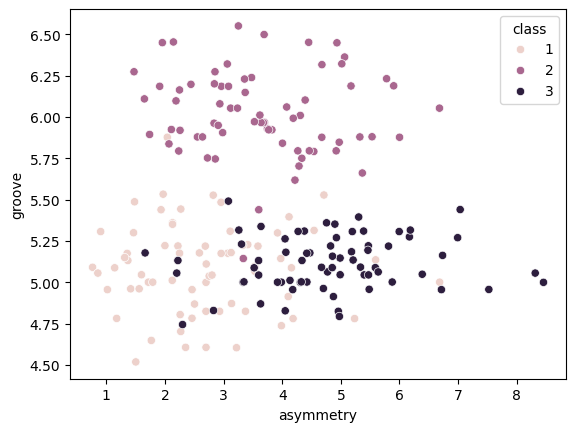

In [4]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
    plt.show()

# Clustering

In [5]:
from sklearn.cluster import KMeans

In [6]:
x = 'perimeter'
y = 'asymmetry'
X = df[[x, y]].values

In [8]:
kmeans = KMeans(n_clusters=3).fit(X)

In [9]:
clusters = kmeans.labels_

In [10]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])

[]

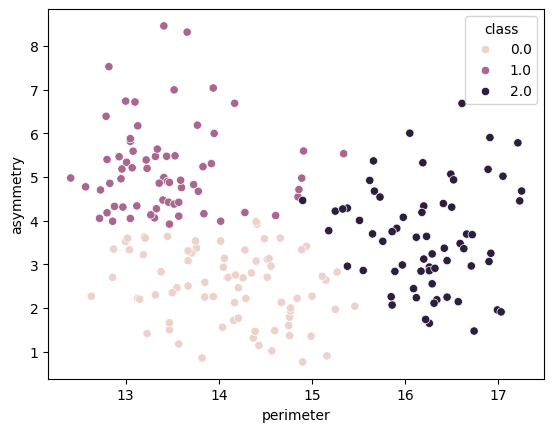

In [11]:
# K Means classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

Actual Classes

[]

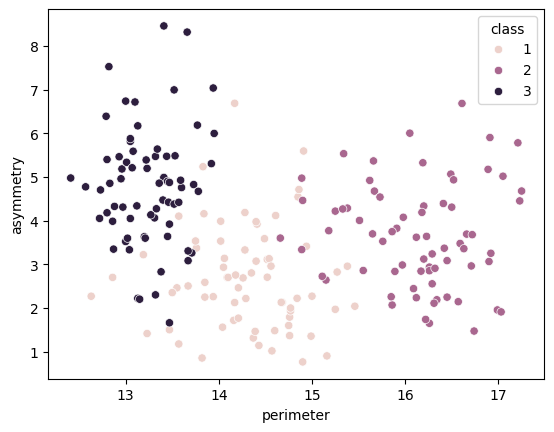

In [12]:
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

# Higher Dimensions

In [13]:
X = df[cols[:-1]].values

In [14]:
kmeans_higher = KMeans(n_clusters=3).fit(X)
cluster_df_higher = pd.DataFrame(np.hstack((X, kmeans_higher.labels_.reshape(-1, 1))), columns=cols)

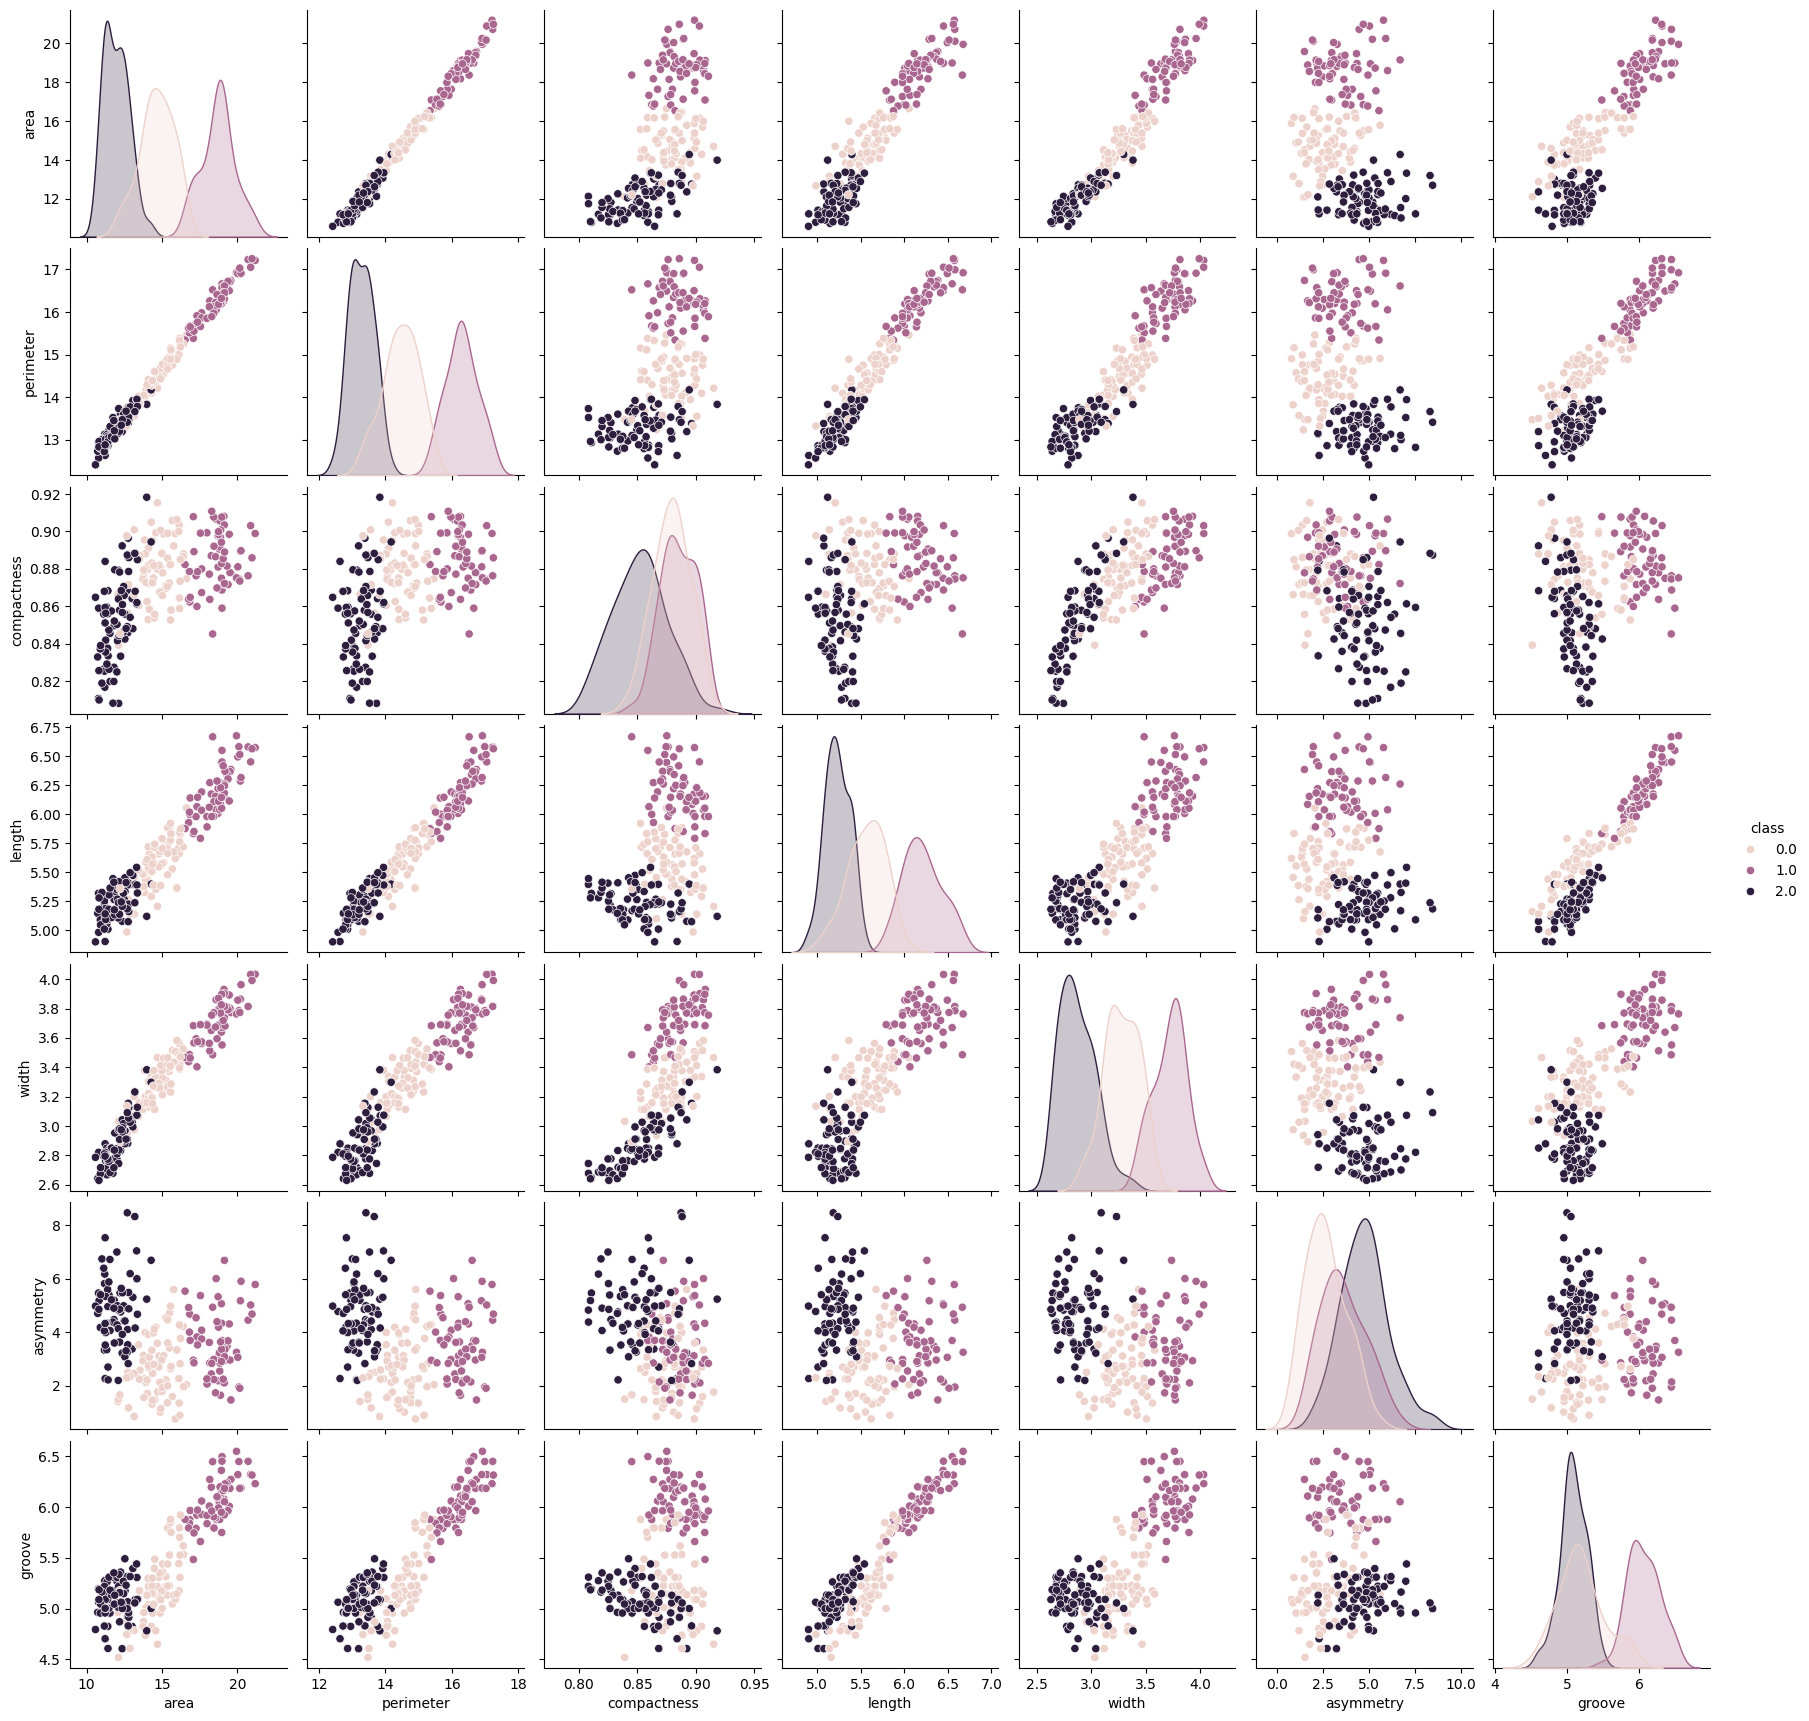

In [15]:
sns.pairplot(cluster_df_higher, hue='class')
plt.plot()

# PCA

In [17]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [20]:
X.shape

(210, 7)

In [22]:
transformed_x.shape

(210, 2)

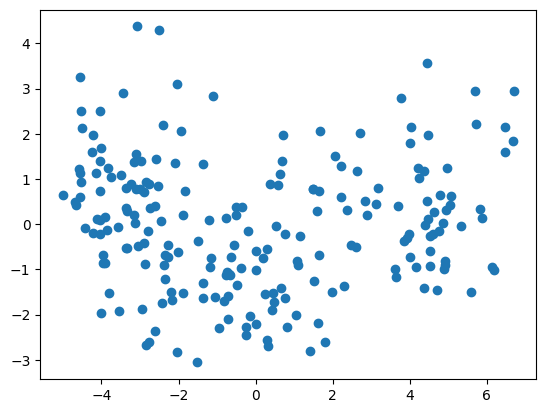

In [23]:
plt.scatter(transformed_x[:, 0], transformed_x[:, 1])
plt.show()

In [24]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans_higher.labels_.reshape(-1, 1))), columns=['PCA1', 'PCA2', 'class'])

In [25]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df['class'].values.reshape(-1, 1))), columns=['PCA1', 'PCA2', 'class'])

<Axes: xlabel='PCA1', ylabel='PCA2'>

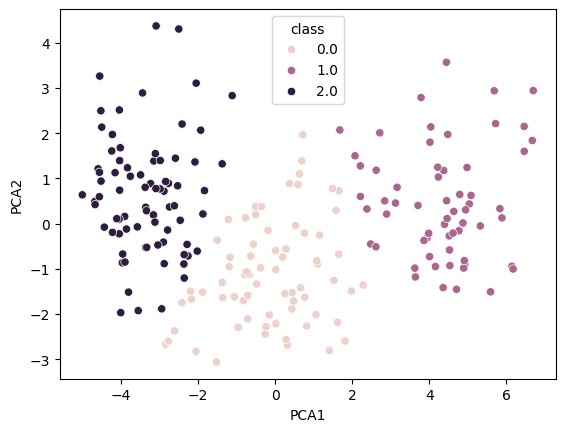

In [26]:
sns.scatterplot(x='PCA1', y='PCA2', hue='class', data=kmeans_pca_df)

<Axes: xlabel='PCA1', ylabel='PCA2'>

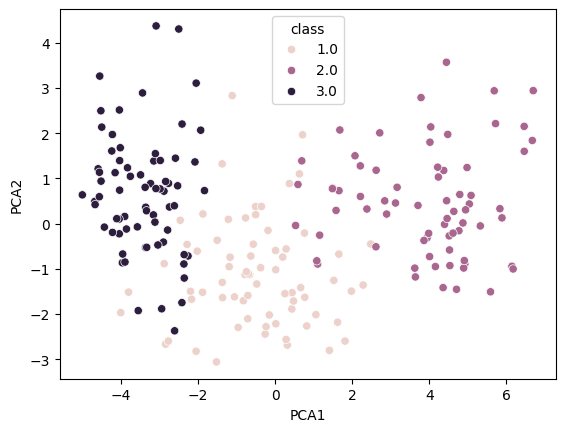

In [27]:
sns.scatterplot(x='PCA1', y='PCA2', hue='class', data=truth_pca_df)